In [152]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
np.random.seed(7)
import warnings
warnings.filterwarnings('ignore')

In [153]:
Italy = pd.read_excel('countries.xlsx', sheet_name='Italy')

In [154]:
Italy = Italy.transpose()

In [155]:

Italy.columns = Italy.iloc[0]
Italy = Italy.drop(Italy.index[0])
Italy.reset_index(level=0, inplace=True)
Italy = Italy.rename(columns={'index' : 'time'})
Italy  = Italy[['active']]

In [156]:
Italy

index,active
0,0
1,0
2,0
3,0
4,0
...,...
120,60960
121,59322
122,57752
123,56594


In [157]:
#plt.figure(figsize=(10,7))
#plt.plot(Italy['time'],Italy['Confirmed'],label='Confirmed')
#plt.plot(Italy['time'],Italy['recovered'],label='recovered')
#plt.plot(Italy['time'],Italy['deaths'],label='deaths')
#plt.plot(Italy['time'],Italy['Susceptible'])
#plt.plot(Italy['time'],Italy['active'],label='active')
#plt.legend()

In [158]:

dataset = Italy.values
dataset = dataset.astype('float32')
#Italy = numpy.log(Italy)

In [159]:
## split into train and test sets
train_size = int(len(dataset) * 0.67)
print(train_size)
test_size = len(dataset) - train_size
print(test_size)
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

83
42
83 42


In [160]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [161]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [162]:
# reshape dataset
trainX, trainY = create_dataset(train)
testX, testY = create_dataset(test)

In [163]:
# create and fit multilayer perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 2311669067.2215
Epoch 2/200
 - 0s - loss: 1934397959.3930
Epoch 3/200
 - 0s - loss: 1593531178.3090
Epoch 4/200
 - 0s - loss: 1293766180.5533
Epoch 5/200
 - 0s - loss: 1022164022.4957
Epoch 6/200
 - 0s - loss: 799291076.3890
Epoch 7/200
 - 0s - loss: 613771871.4467
Epoch 8/200
 - 0s - loss: 461770818.7830
Epoch 9/200
 - 0s - loss: 333839070.1644
Epoch 10/200
 - 0s - loss: 234090570.2538
Epoch 11/200
 - 0s - loss: 156807167.8419
Epoch 12/200
 - 0s - loss: 103971725.3371
Epoch 13/200
 - 0s - loss: 64602703.9519
Epoch 14/200
 - 0s - loss: 38948217.4433
Epoch 15/200
 - 0s - loss: 22853657.5531
Epoch 16/200
 - 0s - loss: 13213441.8487
Epoch 17/200
 - 0s - loss: 7697626.6488
Epoch 18/200
 - 0s - loss: 4689339.1400
Epoch 19/200
 - 0s - loss: 3139015.5589
Epoch 20/200
 - 0s - loss: 2347261.9626
Epoch 21/200
 - 0s - loss: 1930814.8364
Epoch 22/200
 - 0s - loss: 1758953.2102
Epoch 23/200
 - 0s - loss: 1668070.9241
Epoch 24/200
 - 0s - loss: 1633478.7705
Epoch 25/200
 - 

In [164]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score',trainScore, math.sqrt(trainScore))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score',testScore, math.sqrt(testScore))

Train Score 1618602.029296875 1272.2429128499302
Test Score 18534412.0 4305.161088739886


In [165]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


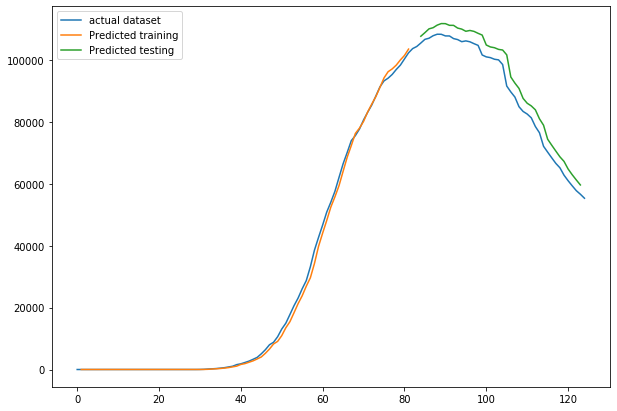

In [166]:
# plot baseline and predictions
plt.figure(figsize=(10,7))
plt.plot(dataset, label='actual dataset')
plt.plot(trainPredictPlot, label='Predicted training')
plt.plot(testPredictPlot, label='Predicted testing')
plt.legend()
plt.show()

83 42
Epoch 1/200
 - 0s - loss: 656396477.7122
Epoch 2/200
 - 0s - loss: 281338406.7093
Epoch 3/200
 - 0s - loss: 113555239.1934
Epoch 4/200
 - 0s - loss: 77528144.4170
Epoch 5/200
 - 0s - loss: 70670255.7099
Epoch 6/200
 - 0s - loss: 70071299.5303
Epoch 7/200
 - 0s - loss: 70059120.3722
Epoch 8/200
 - 0s - loss: 68225276.1517
Epoch 9/200
 - 0s - loss: 67272113.0563
Epoch 10/200
 - 0s - loss: 67632410.7937
Epoch 11/200
 - 0s - loss: 64293093.1104
Epoch 12/200
 - 0s - loss: 64031752.5265
Epoch 13/200
 - 0s - loss: 63906894.9484
Epoch 14/200
 - 0s - loss: 63158259.5387
Epoch 15/200
 - 0s - loss: 63686752.6491
Epoch 16/200
 - 0s - loss: 60428321.2481
Epoch 17/200
 - 0s - loss: 59565417.2503
Epoch 18/200
 - 0s - loss: 56747016.0788
Epoch 19/200
 - 0s - loss: 56508029.1699
Epoch 20/200
 - 0s - loss: 54929049.6563
Epoch 21/200
 - 0s - loss: 54221351.6920
Epoch 22/200
 - 0s - loss: 53459871.0039
Epoch 23/200
 - 0s - loss: 51544924.5928
Epoch 24/200
 - 0s - loss: 51206814.6589
Epoch 25/200
 - 

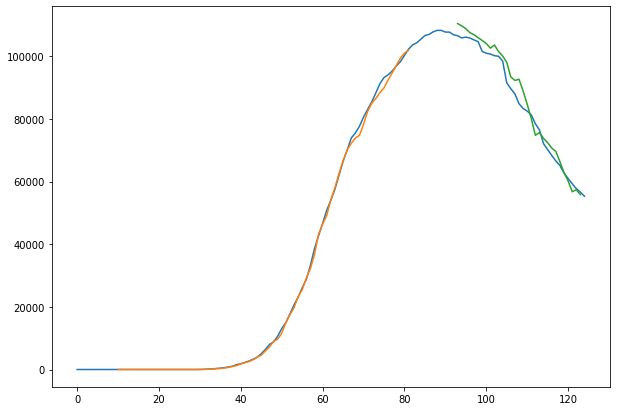

In [167]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# reshape dataset
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= 'relu' ))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score',trainScore, math.sqrt(trainScore))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score',testScore, math.sqrt(testScore))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(10,7))
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()